# Pong

In [2]:
import os 
import time 
import torch 
import gym 
from all.experiments import load_and_watch
from all.bodies import DeepmindAtariBody
from all.experiments import GreedyAgent
from all.environments import AtariEnvironment

In [3]:
def watch(agent, env, fps=60):
    action = None
    returns = 0
    # have to call this before initial reset for pybullet envs
    env.render(mode="human")
    while True:
        time.sleep(1 / fps)
        if env.done:
            print('returns:', returns)
            env.reset()
            if returns != 0:
                break
            returns = 0    
        else:
            env.step(action)
        env.render()
        action = agent.act(env.state, env.reward)
        returns += env.reward

In [5]:
env = AtariEnvironment("Pong")

In [8]:
agent = DeepmindAtariBody(GreedyAgent.load("runs/_dqn 78e88c9 2020-04-14 14_39_49.137988/", env))

C:\Users\efagu\anaconda3\envs\engg3130-final\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [9]:
watch(agent, env)

returns: 0
returns: 20.0


In [7]:
agent = DeepmindAtariBody(GreedyAgent.load("runs/_dqn 78e88c9 2020-04-26 13_03_14.449207/", env))

C:\Users\efagu\anaconda3\envs\engg3130-final\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [8]:
watch(agent, env)

returns: 0
returns: 12.0


# Tetris

Due to the randomness and high variance even in the fully trained tetris model the choice was made to shown pre-rendered saved games rather then render games using a saved mode. This allow for better discussion of the results.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import os
from pprint import pprint

The following blocks set up the frame for the animation and declares the functions that the animation uses.

In [2]:
rc('animation', html='html5')

In [3]:
img = np.ones((400, 200, 3))

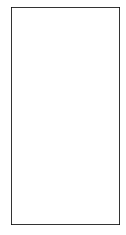

In [4]:
fig, ax = plt.subplots()
plt.xticks([], [])
plt.yticks([], [])
line = plt.imshow(img)

In [5]:
def init():
    line.set_data(np.ones((400, 200, 3)))
    return (line,)

In [6]:
def animate(i):
    img = game[i]
    line.set_data(img)
    return(line,)

From the logs we can clearly see that the 512 batch size experiment was the best, so we will examine the episodes from that run.

Here we look at all the saved episodes and record their steps, so we can watch the best ones. As a note only epsiodes with scores greater than 100 were recorded, as well as every 500 episodes.

In [8]:
dic = {}
for ep in os.listdir('games'):
    file = f'games/{ep}'
    if os.path.exists(file):
        game = np.load(file)
        game = game['arr_0']
    else:
        continue
    i = len(game)
    dic.update( {ep : i} )

In [9]:
pprint(dic)

{'tetris-0.npz': 193,
 'tetris-1000.npz': 344,
 'tetris-1515.npz': 1097,
 'tetris-1835.npz': 20000,
 'tetris-1856.npz': 703}


This function loads the episode from the file, crops it if needed, and calls the animation function.

In [10]:
def anim_episode(episode):
    file = f'games/tetris-{episode}.npz'
    game = np.load(file)
    game = game['arr_0']

    frames = len(game)
    if frames > 10000: # If the game is over 10000 frames we only render the first 10000
        game = game[:10000]
        frames = 10000

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=20, blit=True)
    return game, anim

Now we can look at a few diffrent games throughout the traning.

First lets look at the first episode.

In [11]:
game, anim = anim_episode(0)

In [12]:
anim

Completely random as we would expect, doesn't even clear a single line.

Now let's look at slightly better game

In [13]:
game, anim = anim_episode(1000)

In [14]:
anim

After 1000 episodes the model is still not great and doesn't clear any lines but we can see that it's starting to learn and last slightly longer.

Now if we look at a game slightly later we can see a large improvement.

In [15]:
game, anim = anim_episode(1515)

Rendering the animation may take a few minutes.

In [16]:
anim

This episode last much longer and clears many lines, although we can see it still make some bad moves that lead to the agent losing.

Now lets look at the best game

In [17]:
list(dic.keys())[list(dic.values()).index(max(dic.values()))]

'tetris-1835.npz'

In [18]:
game, anim = anim_episode(1835)

Rendering the animation may take a few minutes.

In [19]:
anim

This game goes on forever and only stoped due to the recording limit in the code. It must be noted that this is an extreme and not the average and the fully trained model is still very inconsistent in the scores produced.

As discussed in the report even after being fully trained the model still had some very poor epsiode lets look at one of those.

In [20]:
game, anim = anim_episode(1841)

In [21]:
anim

In the report it was mentioned that a single bad move was most likely the cause of the poor games, we can see this in this episode. At approximately 7 seconds the agent places a J piece in the center blocking the bottom rows from being able to be cleared. While it is hard the say that this was the move that cause it to lose the game, we can say that it was a bad move that had a major negative impacts on the game.